In [1]:
import pandas as pd

# 加载数据
df = pd.read_json("/Users/viewyan/fairchem/src/fairchem/data/odac/force_field/data_w_oms.json")  # 请替换成你本地的路径

# 查看基本结构
print("Sample number：", len(df))
print("field name：", df.columns.tolist())

# 查看每种 set 的分布
print(df['set'].value_counts())



Sample number： 51478
field name： ['name', 'y', 'y_sys', 'y_mof', 'y_mol', 'id', 'set', 'path', 'oms', 'defective', 'ff']
set
train    48875
test      1391
val       1212
Name: count, dtype: int64


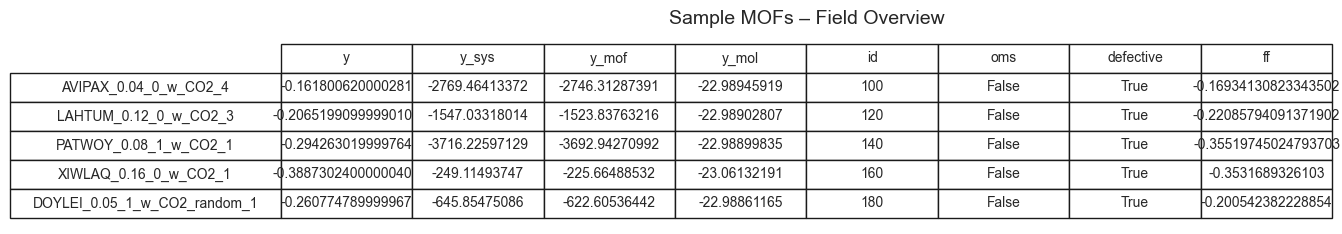

In [24]:
import matplotlib.pyplot as plt

# 你刚刚画过图的字段（除了 name）
columns_to_show = [col for col in df_full.columns if col != 'name' and pd.api.types.is_numeric_dtype(df_full[col])]

# 设置前5个 MOF 样本作为展示
df_preview = df_full.set_index('name')[columns_to_show].head(5)

# 画出可视化表格
fig, ax = plt.subplots(figsize=(14, 2.5))  # 宽一点，高度根据你内容调
ax.axis('off')

table = ax.table(cellText=df_preview.values,
                 colLabels=df_preview.columns,
                 rowLabels=df_preview.index,
                 loc='center',
                 cellLoc='center',
                 rowLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.8)

plt.title("Sample MOFs – Field Overview", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


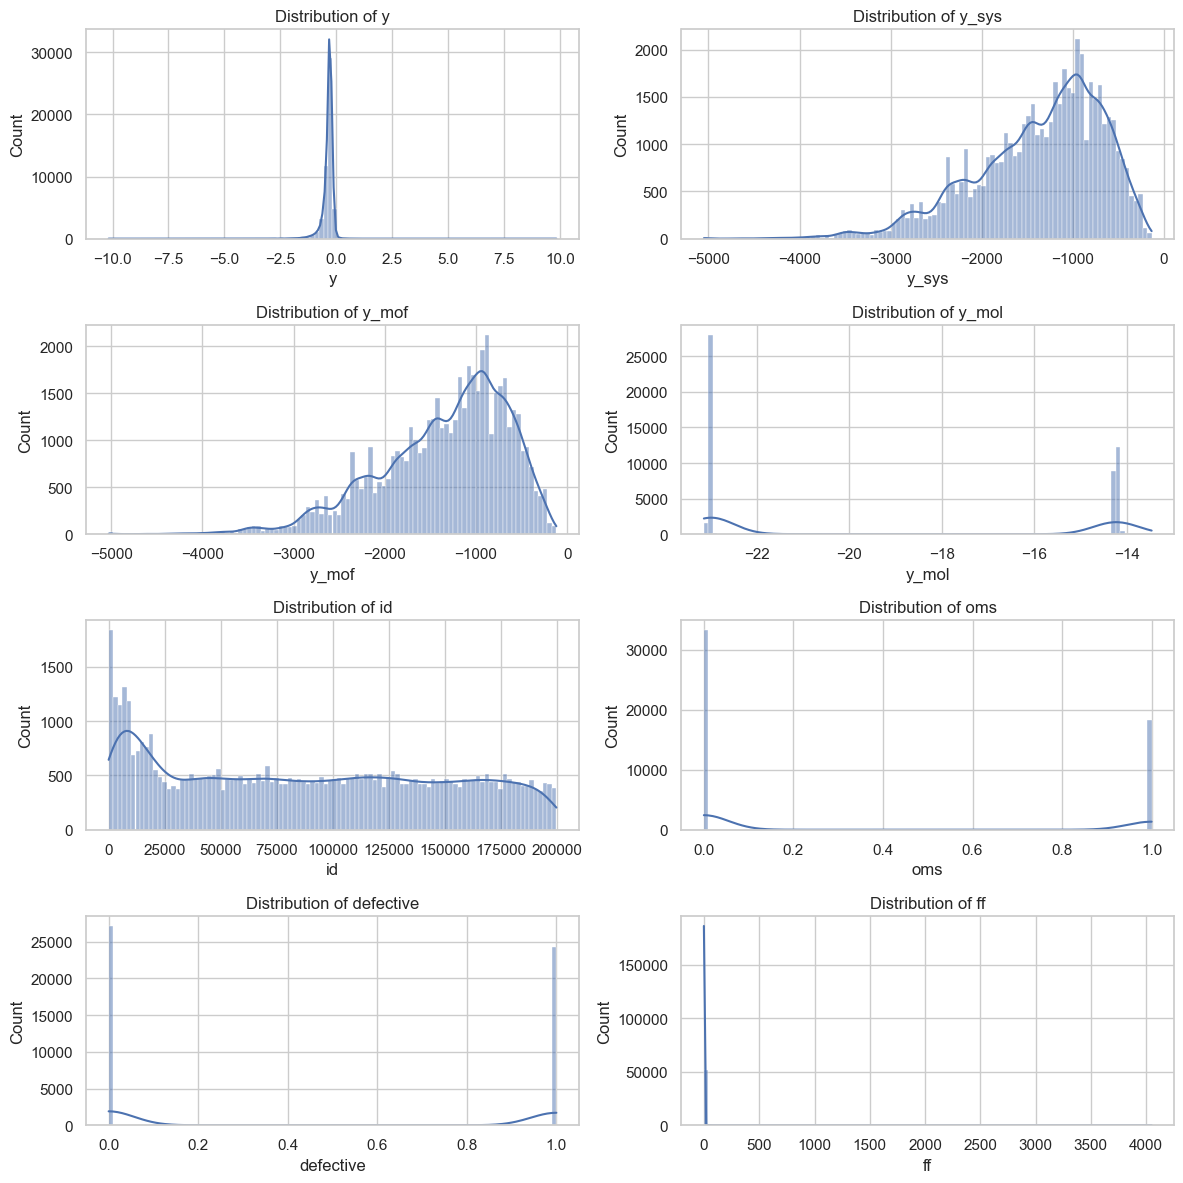

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 要排除的非数值字段
exclude_fields = ['name']

# 获取所有数值型字段
columns_to_plot = [col for col in df_full.columns if col not in exclude_fields and pd.api.types.is_numeric_dtype(df_full[col])]

# 设置每页显示 8 个（4 行 × 2 列）
cols_per_page = 8
n_pages = math.ceil(len(columns_to_plot) / cols_per_page)

for page in range(n_pages):
    subset = columns_to_plot[page * cols_per_page : (page + 1) * cols_per_page]
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        sns.histplot(df_full[col], bins=100, kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")

    # 清理多余子图
    for j in range(len(subset), 8):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 加载第二个数据包
df_ml = pd.read_json("/Users/viewyan/fairchem/src/fairchem/data/odac/force_field/data_w_ml.json")

# 打印字段信息和样本数
print("样本数：", len(df_ml))
print("字段：", df_ml.columns.tolist())


样本数： 1693
字段： ['dft', 'ads', 'id', 'name', 'set', 'oms', 'defective', 'ml', 'ff']


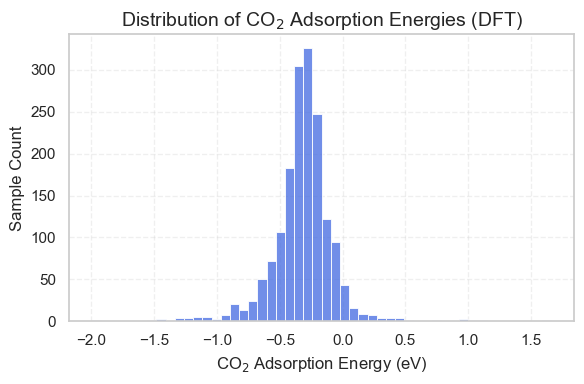

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(df_ml['dft'], bins=50, kde=False, color='royalblue')
plt.title("Distribution of CO$_2$ Adsorption Energies (DFT)", fontsize=14)
plt.xlabel("CO$_2$ Adsorption Energy (eV)", fontsize=12)
plt.ylabel("Sample Count", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# 加载两个数据集
df_full = pd.read_json("/Users/viewyan/fairchem/src/fairchem/data/odac/force_field/data_w_oms.json")
df_small = pd.read_json("/Users/viewyan/fairchem/src/fairchem/data/odac/force_field/data_w_ml.json")

# 只保留有共同 ID 的部分
common_ids = set(df_full['id']).intersection(set(df_small['id']))
df_full_sub = df_full[df_full['id'].isin(common_ids)].copy()
df_small_sub = df_small[df_small['id'].isin(common_ids)].copy()

# 合并两个表
df_merge = pd.merge(df_full_sub, df_small_sub, on="id", suffixes=("_full", "_ml"))

# 查看合并后的结构
print("Merged field：", df_merge.columns.tolist())
# 打印合并后的前几行，看看字段具体叫什么
print(df_merge[['id', 'y', 'dft', 'ml', 'ff_ml']].head())
print((df_merge['ff_full'] == df_merge['ff_ml']).value_counts())



Merged field： ['name_full', 'y', 'y_sys', 'y_mof', 'y_mol', 'id', 'set_full', 'path', 'oms_full', 'defective_full', 'ff_full', 'dft', 'ads', 'name_ml', 'set_ml', 'oms_ml', 'defective_ml', 'ml', 'ff_ml']
    id         y       dft        ml     ff_ml
0  100 -0.161801 -0.414450 -0.397217  0.087584
1  160 -0.388730 -0.346068 -0.387695 -0.481284
2  180 -0.260775 -0.448868 -0.739258 -0.464014
3  380 -0.284581  0.346196  0.019287 -0.217774
4  420 -0.446775 -0.448081 -0.456787 -0.104122
False    1462
True     1391
Name: count, dtype: int64


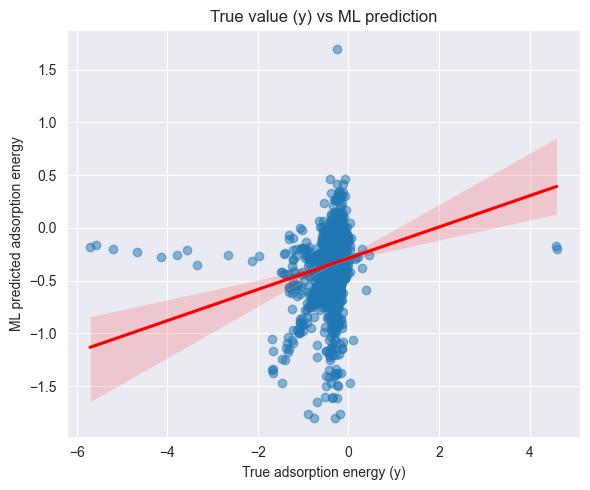

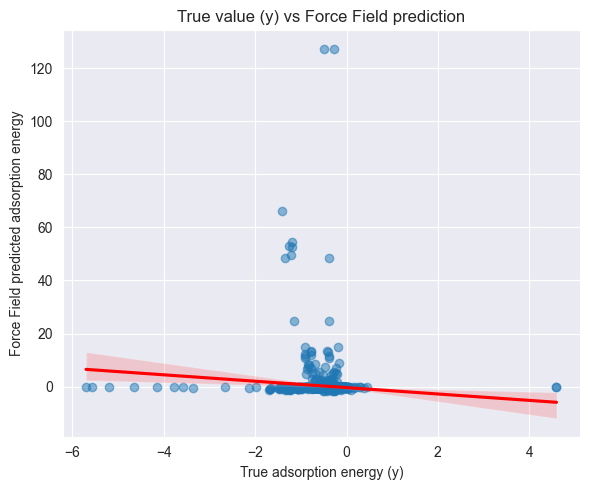

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.regplot(data=df_merge, x='y', y='ml', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title("True value (y) vs ML prediction")
plt.xlabel("True adsorption energy (y)")
plt.ylabel("ML predicted adsorption energy")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.regplot(data=df_merge, x='y', y='ff_ml', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title("True value (y) vs Force Field prediction")
plt.xlabel("True adsorption energy (y)")
plt.ylabel("Force Field predicted adsorption energy")
plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_ml = mean_absolute_error(df_merge['y'], df_merge['ml'])
mae_ff = mean_absolute_error(df_merge['y'], df_merge['ff_ml'])

mse_ml = mean_squared_error(df_merge['y'], df_merge['ml'])
mse_ff = mean_squared_error(df_merge['y'], df_merge['ff_ml'])

print(f"MAE - ML: {mae_ml:.4f} | FF: {mae_ff:.4f}")
print(f"MSE - ML: {mse_ml:.4f} | FF: {mse_ff:.4f}")


MAE - ML: 0.1707 | FF: 0.5038
MSE - ML: 0.1366 | FF: 20.4893


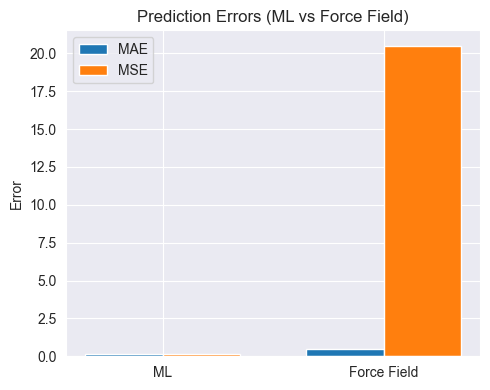

In [14]:
import numpy as np

plt.figure(figsize=(5,4))
methods = ['ML', 'Force Field']
mae_vals = [mae_ml, mae_ff]
mse_vals = [mse_ml, mse_ff]

x = np.arange(len(methods))
width = 0.35

plt.bar(x - width/2, mae_vals, width, label='MAE')
plt.bar(x + width/2, mse_vals, width, label='MSE')
plt.xticks(x, methods)
plt.ylabel("Error")
plt.title("Prediction Errors (ML vs Force Field)")
plt.legend()
plt.tight_layout()
plt.show()
